
# Introducción a Redes Neuronales Convolucionales (CNNs)

Las redes neuronales convolucionales (CNNs) son un tipo especial de red neuronal muy utilizada en el procesamiento y análisis de imágenes. En este notebook aprenderás los fundamentos teóricos y prácticos, y realizarás tu primera clasificación de imágenes usando Python y Keras.

---

## 1. ¿Qué es una CNN?

Una CNN es una red diseñada para procesar datos con una estructura de cuadrícula, como imágenes. Sus aplicaciones más conocidas incluyen:
- Reconocimiento de objetos en fotos
- Detección de caras
- Diagnóstico médico por imagen

### Componentes principales de una CNN:
- **Capa convolucional (Conv2D)**: Aplica filtros para detectar patrones locales.
- **Capa de activación (ReLU)**: Añade no linealidad.
- **Capa de agrupamiento (Pooling)**: Reduce el tamaño y complejidad (ej. MaxPooling).
- **Capa densa (Dense)**: Conecta todo para tomar la decisión final (clasificación).

![CNN Architecture](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)



---

## 2. Visualización: ¿Qué hace una convolución?


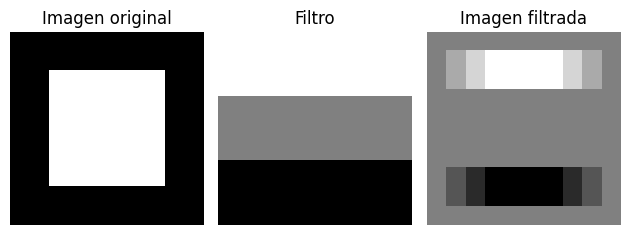

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Imagen simple (blanco y negro)
image = np.zeros((10, 10))
image[2:8, 2:8] = 1

# Filtro para detección de bordes horizontales
kernel = np.array([[1, 1, 1],
                   [0, 0, 0],
                   [-1, -1, -1]])

filtered_image = convolve2d(image, kernel, mode='same')

plt.subplot(1,3,1)
plt.title('Imagen original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Filtro')
plt.imshow(kernel, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Imagen filtrada')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()



---

## 3. Construye tu primera CNN con Keras

### Vamos a clasificar dígitos escritos a mano con el dataset MNIST


In [3]:

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# 1. Cargar los datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train[..., np.newaxis] / 255.0
X_test = X_test[..., np.newaxis] / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Definir el modelo
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

# 3. Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Entrenar
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.1)

# 5. Evaluar
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en test: {test_acc:.2f}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 55ms/step - accuracy: 0.8673 - loss: 0.4447 - val_accuracy: 0.9853 - val_loss: 0.0580
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.9813 - loss: 0.0617 - val_accuracy: 0.9878 - val_loss: 0.0430
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.9879 - loss: 0.0377 - val_accuracy: 0.9882 - val_loss: 0.0374
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9841 - loss: 0.0437
Precisión en test: 0.99



---

## 4. Ejercicio Propuesto

- Modifica la arquitectura para usar **más filtros** o **más capas**.
- Cambia la función de activación por `tanh` o `sigmoid`.
- Usa el dataset CIFAR-10 (`from tensorflow.keras.datasets import cifar10`).



---

## 5. Recursos adicionales

- [DeepLearning.AI - Curso CNNs (Coursera)](https://www.coursera.org/learn/convolutional-neural-networks)
- [TensorFlow Tutorial CNN](https://www.tensorflow.org/tutorials/images/cnn)
- [Visualización de CNNs en Playground](https://poloclub.github.io/cnn-explainer/)

---

¿Listo para experimentar? ¡Modifica, ejecuta y aprende!
